#HACKATHON SANTE


In [183]:
import pandas as pd
import numpy as np
import pdb
%matplotlib inline
data = pd.read_excel('Honoraires_totaux_des_professionnels_de_sante_par_departement_en_2013.xls',sheetname=2)
data.replace('nc',np.nan, inplace=True,regex=True)
print data.count(0)/data.shape[0]    # check data purity

SPECIALISTES                           0.827957
DEPARTEMENT                            0.843512
EFFECTIFS                              0.580645
HONORAIRES SANS DEPASSEMENT (euros)    0.344190
DEPASSEMENTS (euros)                   0.344190
FRAIS DE DEPLACEMENTS (euros)          0.344190
HONORAIRES TOTAUX (euros)              0.344190
NOMBRE DE DEPASSEMENTS                 0.344190
DEPASSEMENT MOYEN (euros)              0.344190
dtype: float64


In [184]:
data['DEPARTEMENT'].replace('^TOTAL.*',np.nan,regex=True,inplace=True)
data.replace('é','e', inplace=True)
data = data.dropna()
data.rename(columns={'DEPASSEMENTS (euros)':'DEPASSEMENTS','NOMBRE DE DEPASSEMENTS':'NOMBRE_DE_DEPASSEMENTS'}, inplace=True)

data.replace('[0-9][0-9]*-','', inplace=True, regex=True)

data.head()

/home/khalil/anaconda/lib/python2.7/site-packages/pandas/core/common.py:516: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  mask = arr == x


,SPECIALISTES,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (euros),DEPASSEMENTS,FRAIS DE DEPLACEMENTS (euros),HONORAIRES TOTAUX (euros),NOMBRE_DE_DEPASSEMENTS,DEPASSEMENT MOYEN (euros)
0,Anesthesie-reanimation chirurgicale,Ain,17,4329488,1879396,0,6208884,27995,67
1,Anesthesie-reanimation chirurgicale,Aisne,22,4615160,191421,119,4806700,8150,23
2,Anesthesie-reanimation chirurgicale,Allier,19,4872085,416466,0,5288551,9479,43
5,Anesthesie-reanimation chirurgicale,Alpes-Maritimes,105,21618434,9266410,0,30884844,110114,84
6,Anesthesie-reanimation chirurgicale,Ardèche,21,5212563,682624,9,5895196,12231,55


1) Corrélation entre la densité de médecin par métier et par spécialité et le dépassement des honoraires

In [185]:

DEPT_agg = data.groupby(['DEPARTEMENT']).sum()
DEPT_agg = DEPT_agg[['EFFECTIFS']]

DEPT_agg['DEPARTEMENT']=DEPT_agg.index.values
DEPT_agg.rename(columns={'EFFECTIFS': 'EFFECTIFS_par_DEPT'}, inplace=True)
data = pd.merge(data, DEPT_agg, on='DEPARTEMENT',how='inner')
data['Densite']= data.EFFECTIFS/data.EFFECTIFS_par_DEPT
data.head()

,SPECIALISTES,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (euros),DEPASSEMENTS,FRAIS DE DEPLACEMENTS (euros),HONORAIRES TOTAUX (euros),NOMBRE_DE_DEPASSEMENTS,DEPASSEMENT MOYEN (euros),EFFECTIFS_par_DEPT,Densite
0,Anesthesie-reanimation chirurgicale,Ain,17,4329488,1879396,0,6208884,27995,67,1571,0.010821
1,Reanimation medicale,Ain,0,0,0,0,0,0,0,1571,0.000000
2,"TOTAL ANESTHESIE REANIMATION (02, 20)",Ain,17,4329488,1879396,0,6208884,27995,67,1571,0.010821
3,Pathologie cardio-vasculaire,Ain,16,4659258,244823,0,4904081,11550,21,1571,0.010185
4,Chirurgie infantile,Ain,0,0,0,0,0,0,0,1571,0.000000


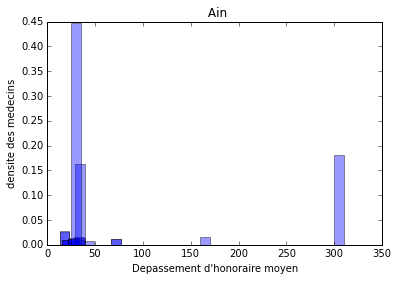

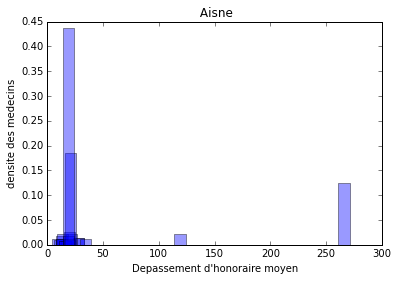

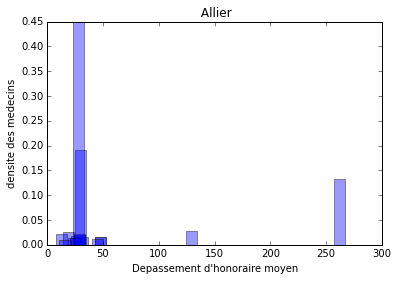

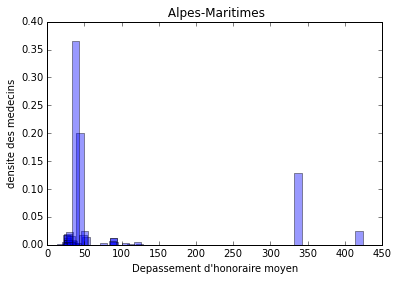

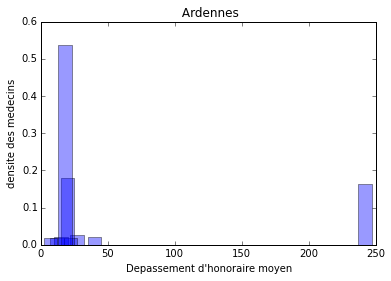

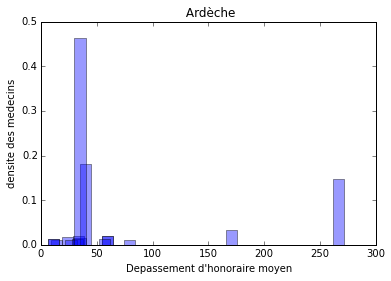

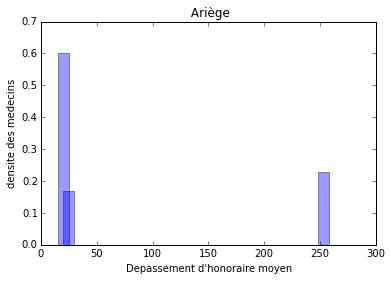

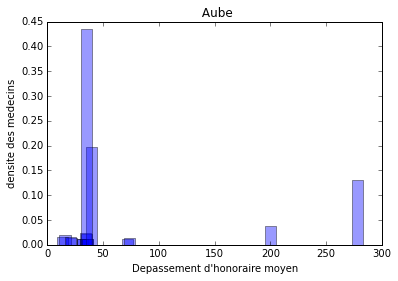

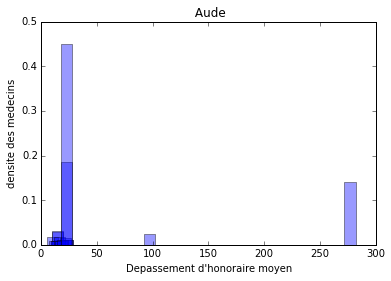

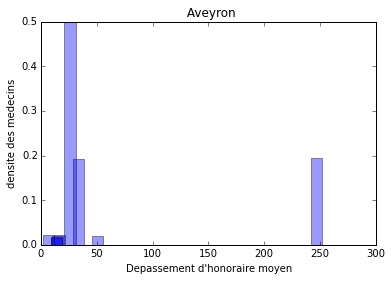

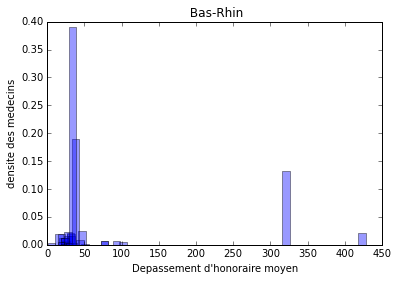

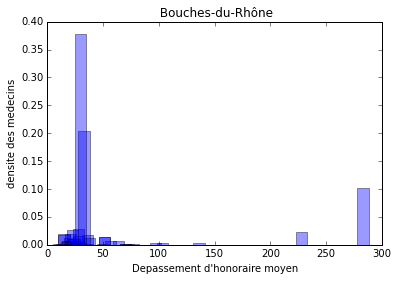

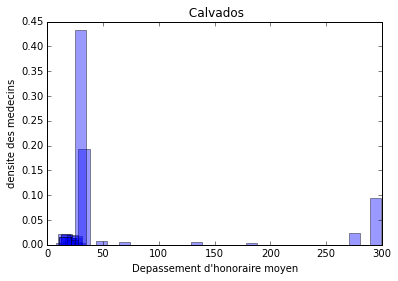

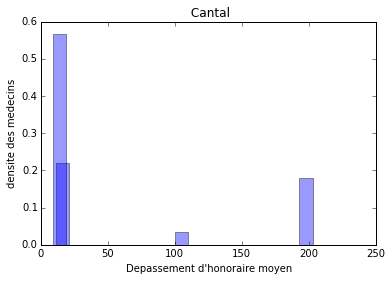

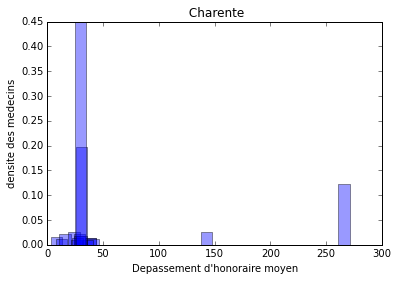

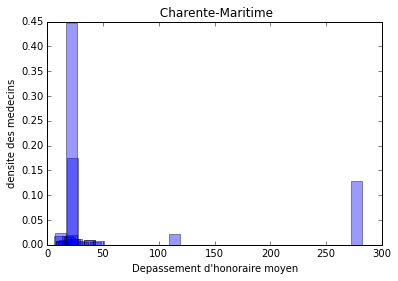

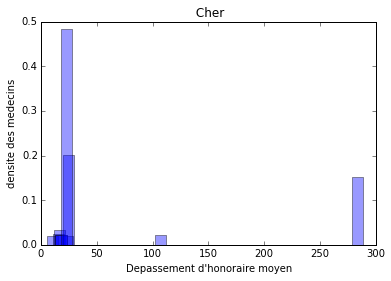

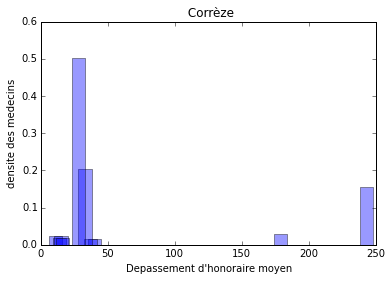

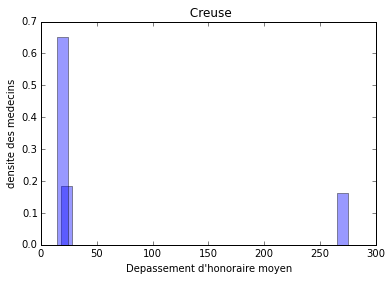

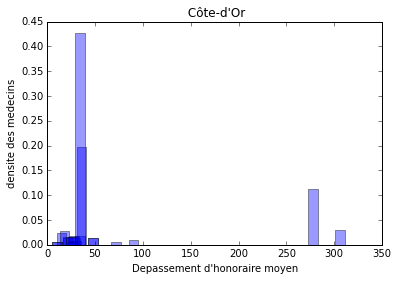

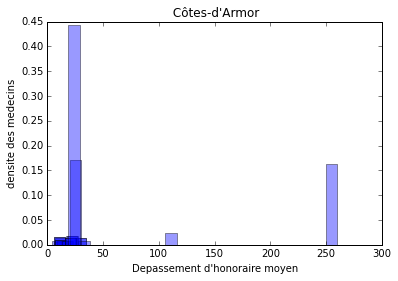

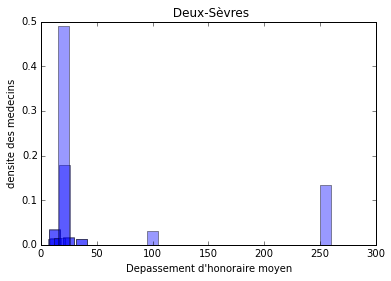

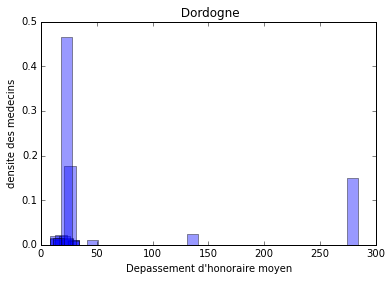

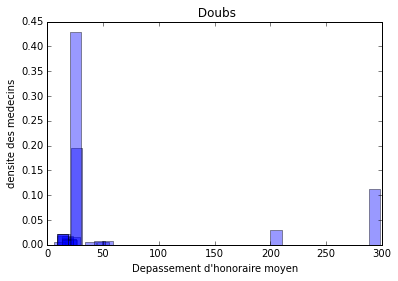

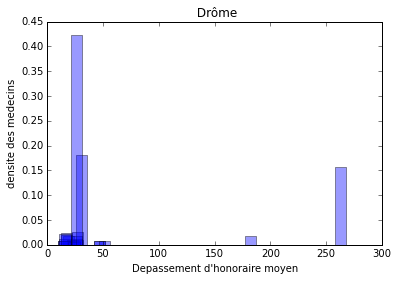

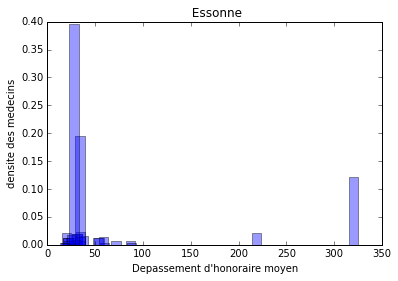

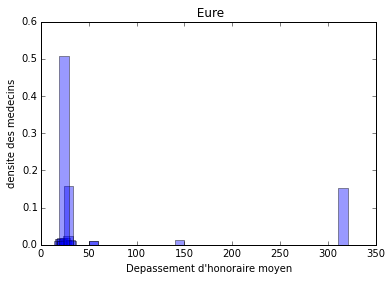

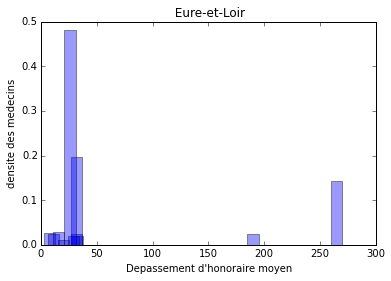

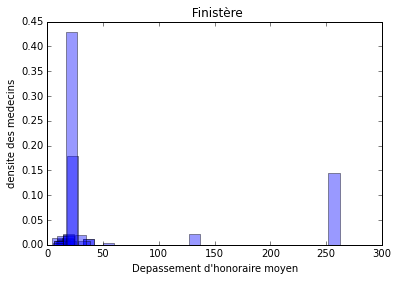

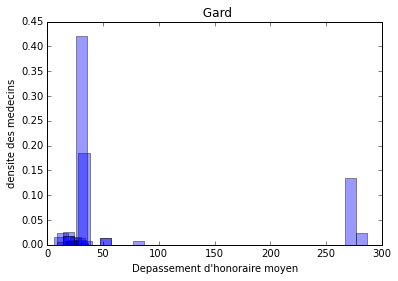

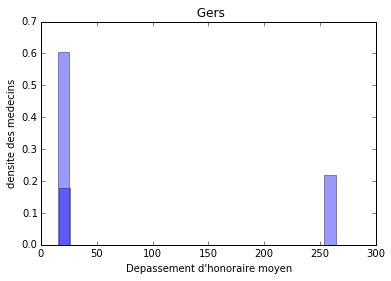

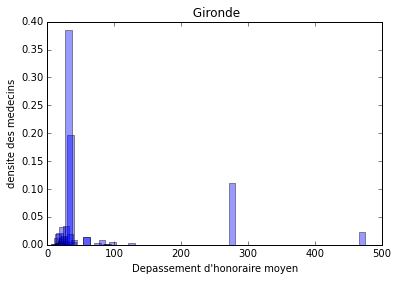

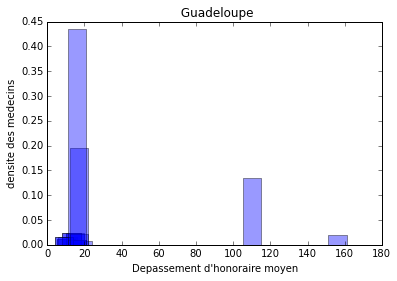

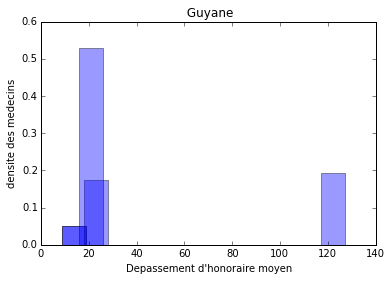

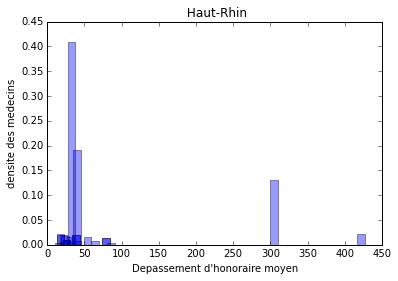

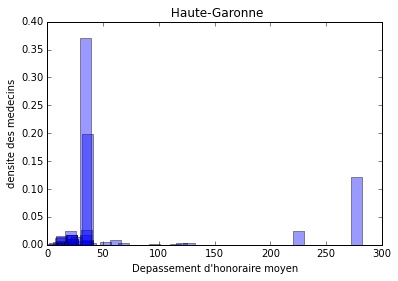

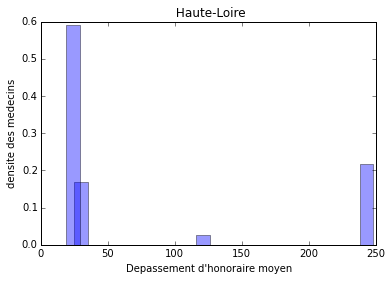

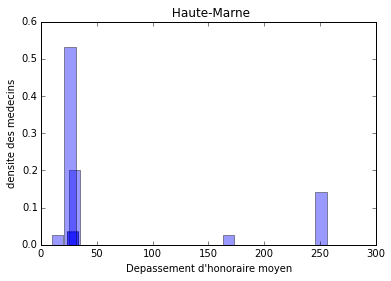

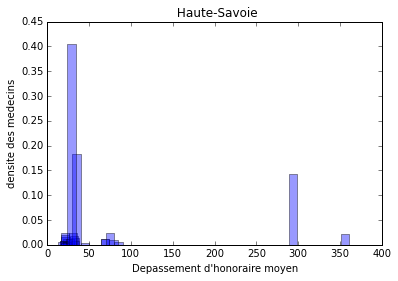

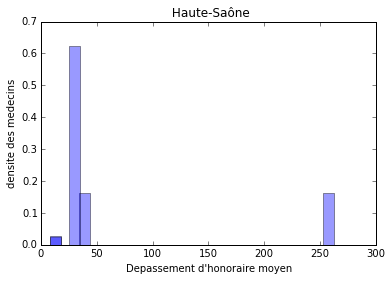

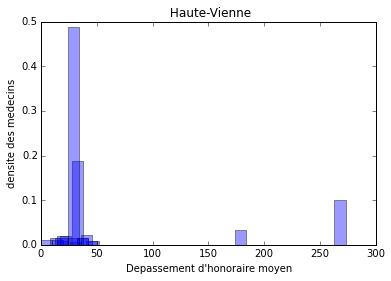

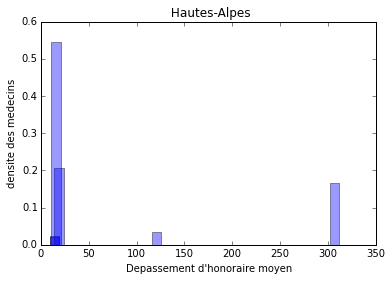

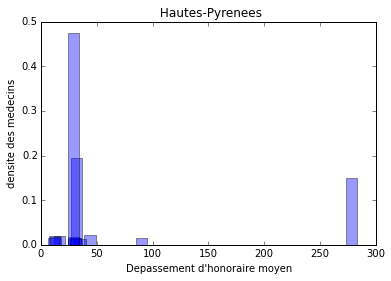

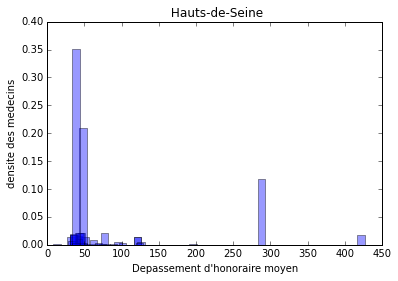

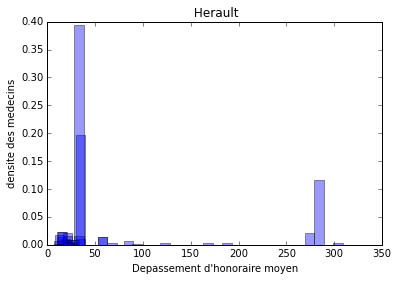

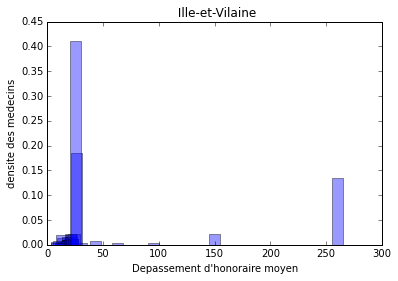

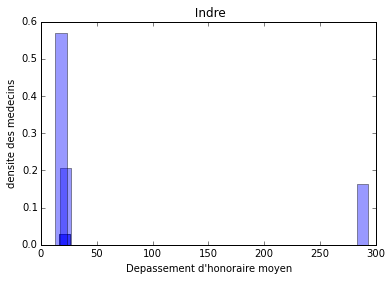

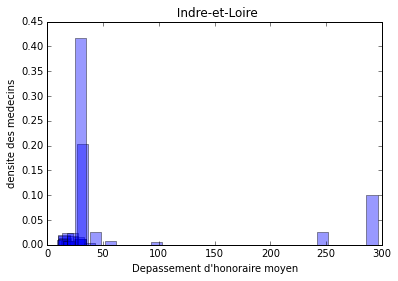

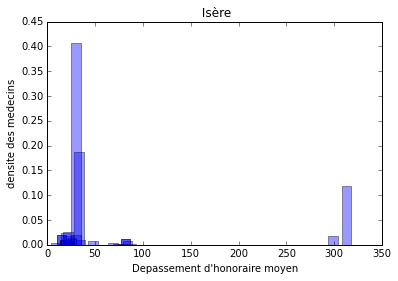

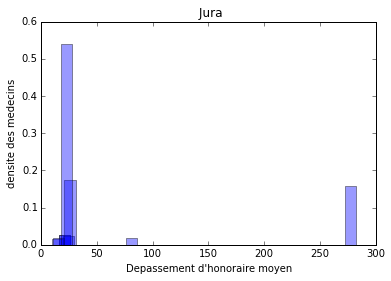

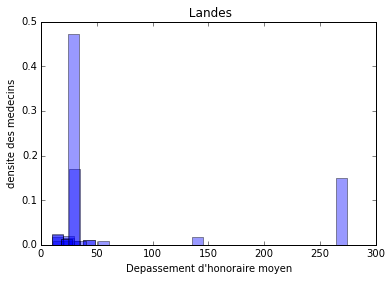

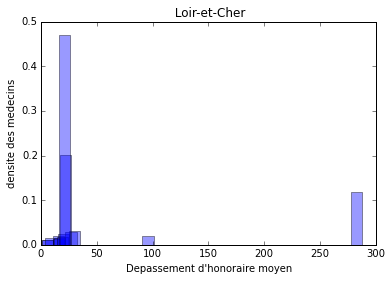

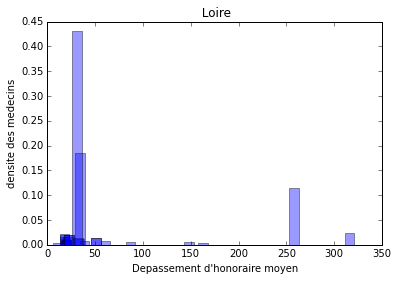

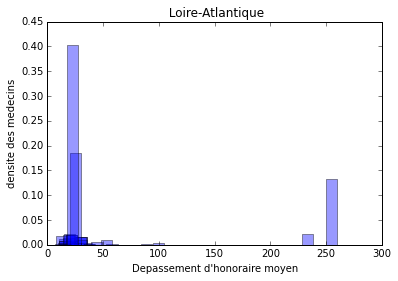

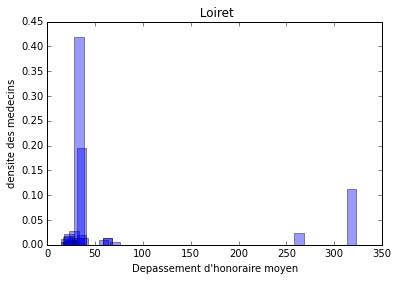

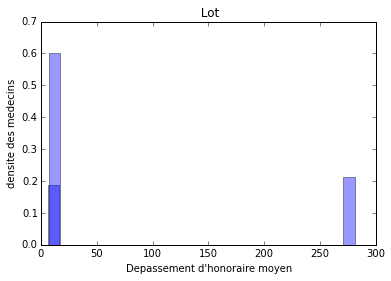

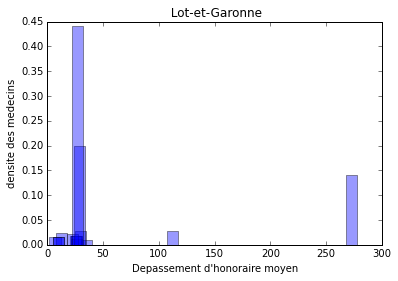

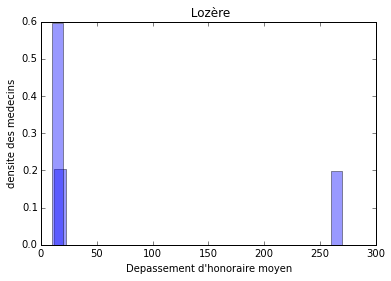

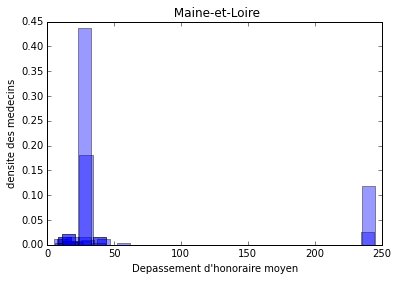

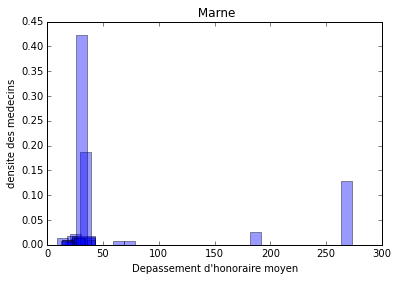

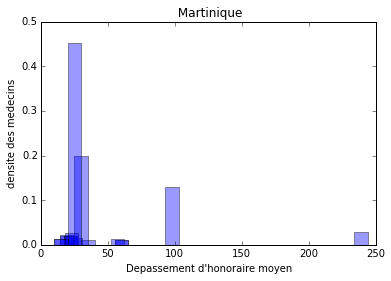

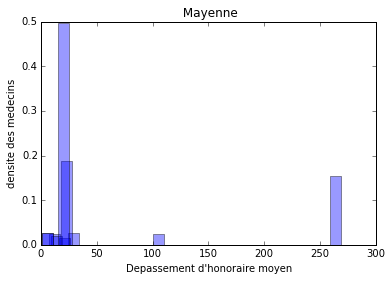

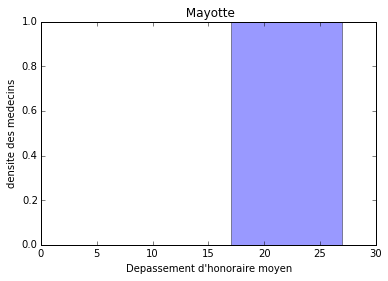

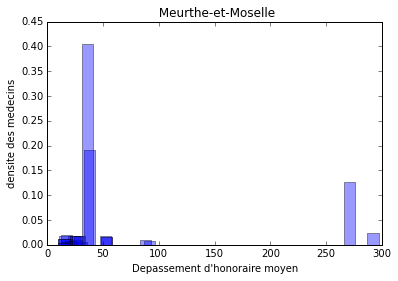

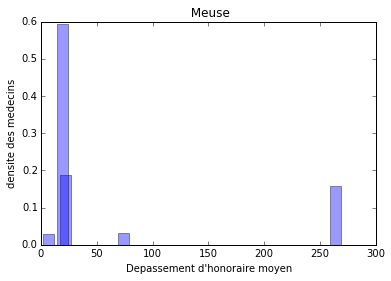

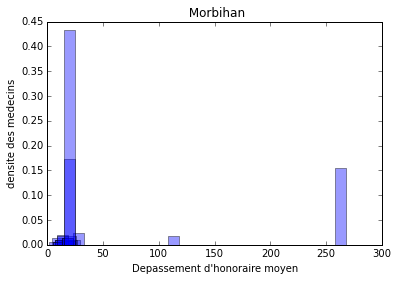

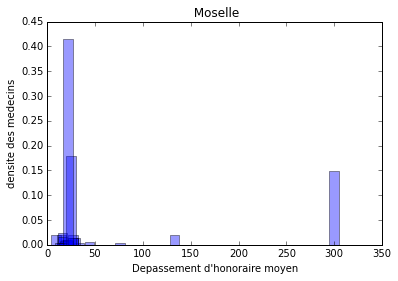

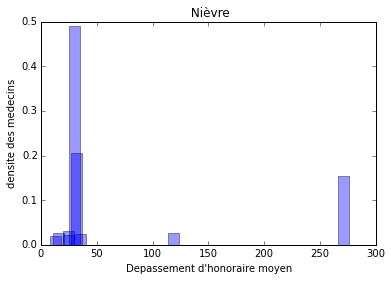

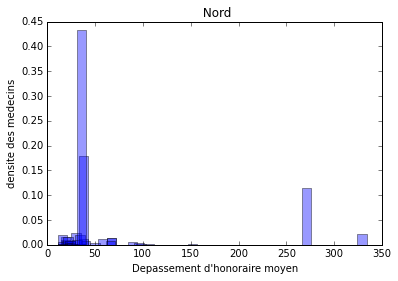

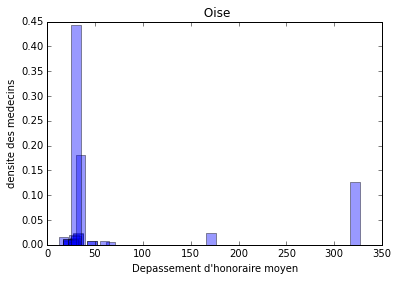

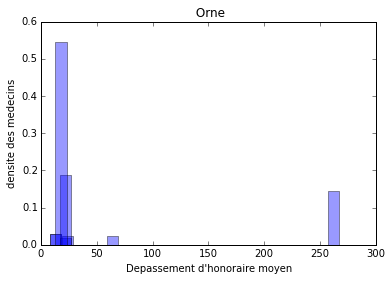

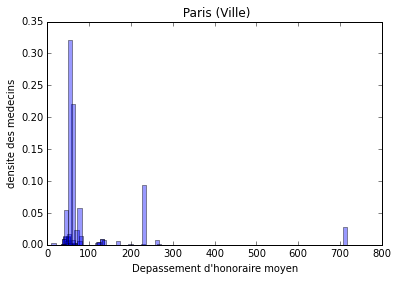

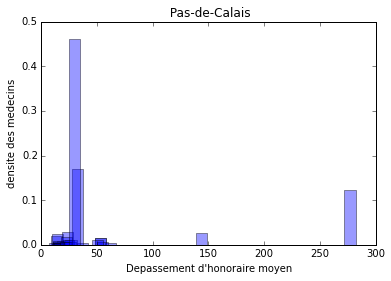

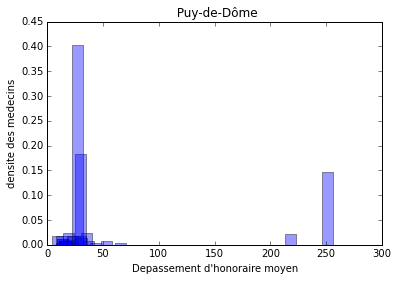

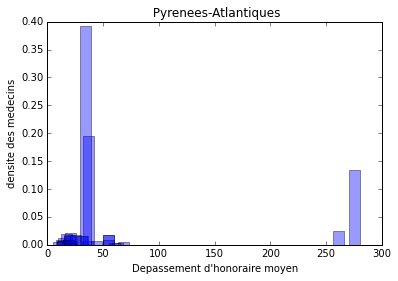

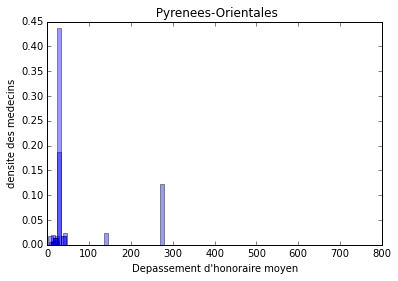

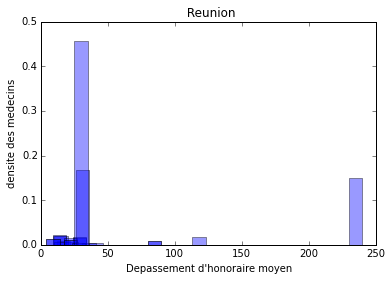

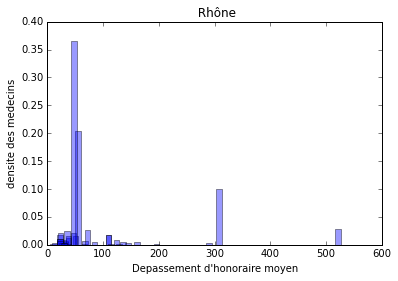

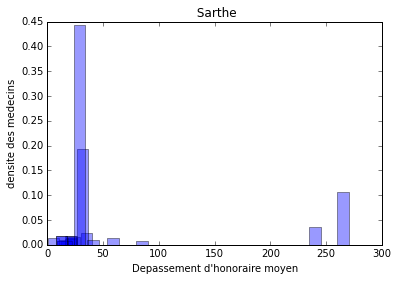

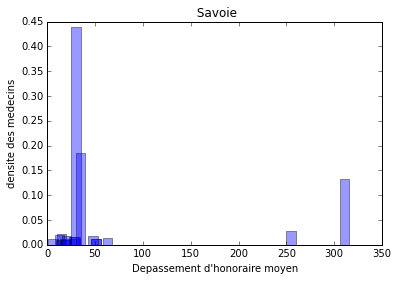

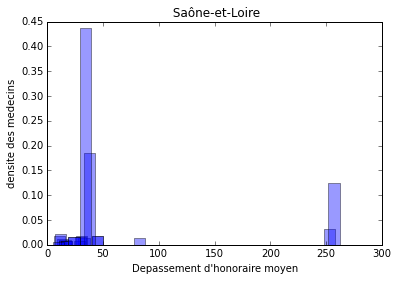

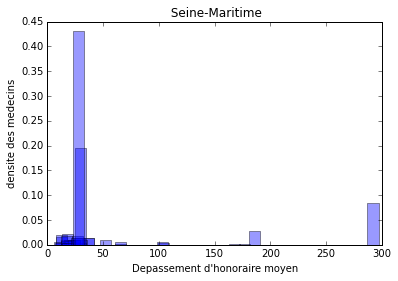

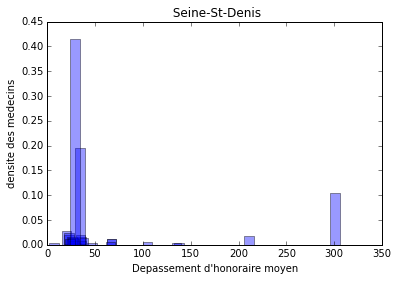

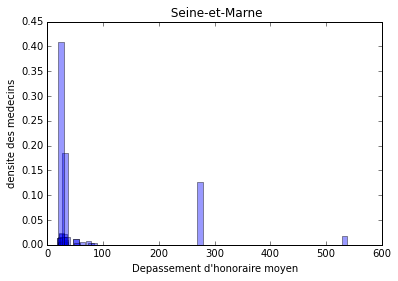

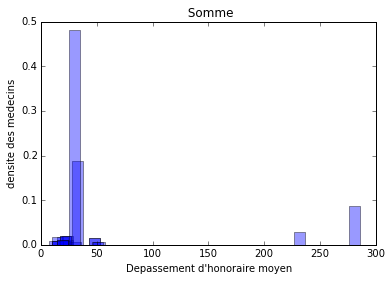

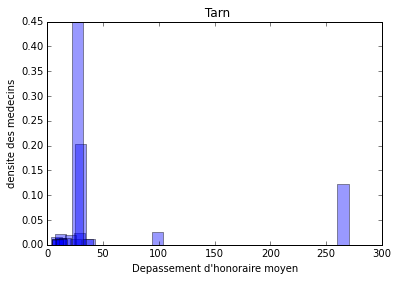

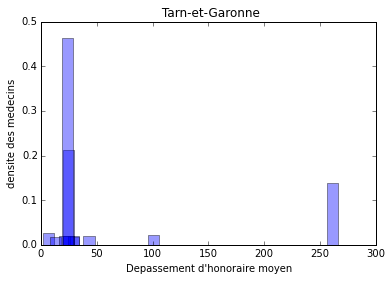

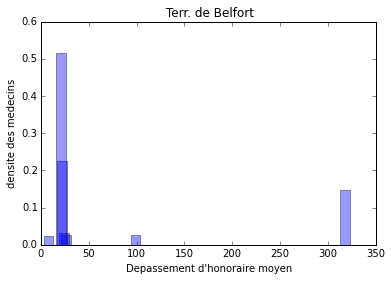

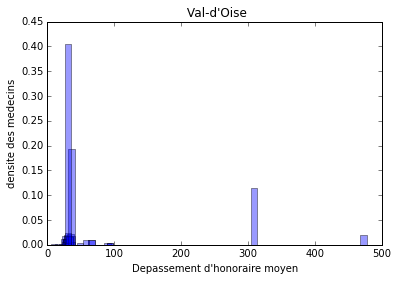

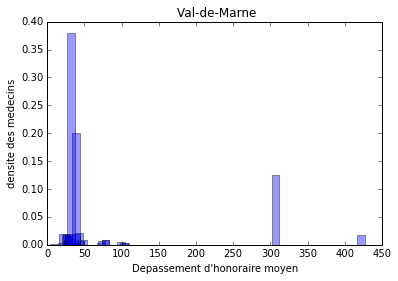

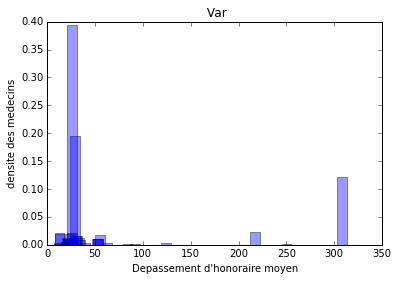

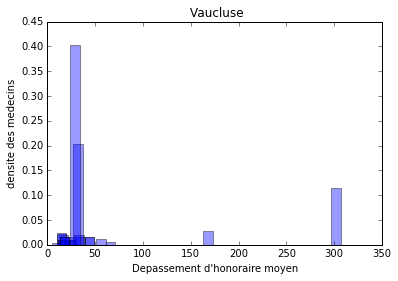

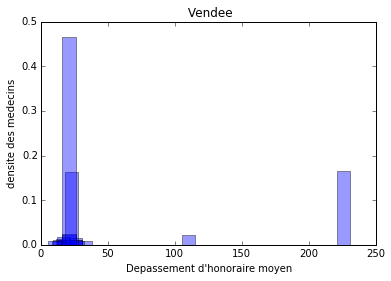

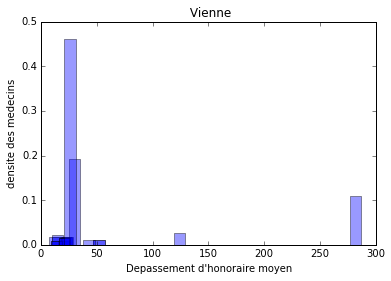

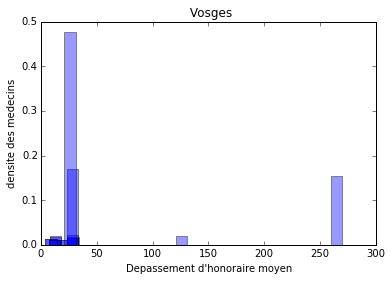

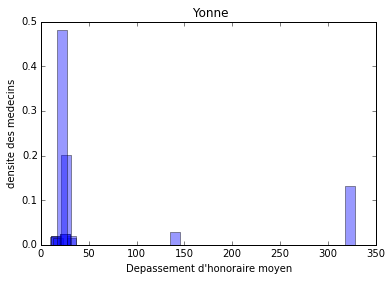

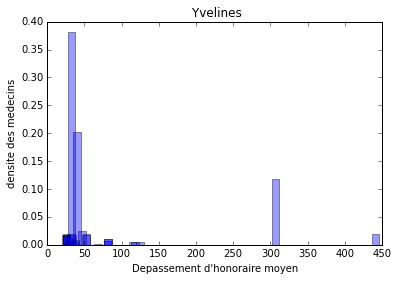

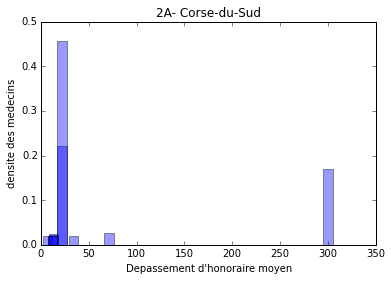

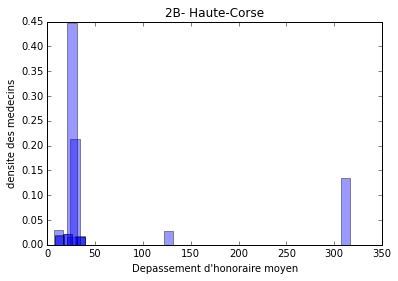

In [186]:
import matplotlib.pyplot as plt
for key, grp in data.groupby(['DEPARTEMENT']):
    #pdb.set_trace()
    plt.bar(grp['DEPASSEMENT MOYEN (euros)'],grp.Densite,10,alpha=0.4)
    plt.xlabel('Depassement d\'honoraire moyen')
    plt.ylabel('densite des medecins')
    #plt.xticks(index + bar_width, ('A', 'B', 'C', 'D', 'E'))
    plt.title(key)
    plt.show()

Pas de correlation entre le dépassement et la densité des médecins par région

2) Corrélation entre la densité de médecin par département et le dépassement des honoraires

In [187]:
DEPT_agg = data.groupby(['DEPARTEMENT'],as_index=False).sum()
DEPT_agg['DEPASSEMENT_MOY_DEPT'] = DEPT_agg.DEPASSEMENTS/DEPT_agg.NOMBRE_DE_DEPASSEMENTS
DEPT_agg['DENSITE_EFFECTIF_DEPT'] = DEPT_agg.EFFECTIFS/DEPT_agg.EFFECTIFS.sum()
DEPT_agg.head()


,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (euros),DEPASSEMENTS,FRAIS DE DEPLACEMENTS (euros),HONORAIRES TOTAUX (euros),NOMBRE_DE_DEPASSEMENTS,DEPASSEMENT MOYEN (euros),EFFECTIFS_par_DEPT,Densite,DEPASSEMENT_MOY_DEPT,DENSITE_EFFECTIF_DEPT
0,Ain,1571,269860433,73049633,322329,343232395,1497791,933,51843,1,48.771580,0.005547
1,Aisne,1634,330140860,41109698,396610,371647168,1040258,633,55556,1,39.518752,0.005770
2,Allier,1251,247473046,40205726,355832,288034604,854580,725,35028,1,47.047352,0.004417
3,Alpes-Maritimes,8181,1317112583,421209385,1235927,1739557895,8446393,2278,319059,1,49.868552,0.028887
4,Ardennes,694,129213207,15896200,212374,145321781,284624,358,17350,1,55.849823,0.002450


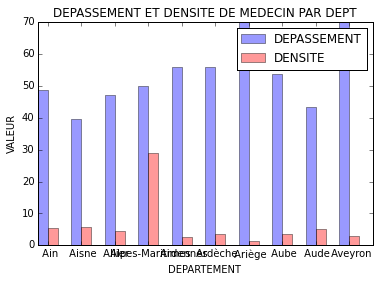

In [188]:
import numpy as np
import matplotlib.pyplot as plt
print 
y_1 = tuple((DEPT_agg.DEPASSEMENT_MOY_DEPT[:10]).tolist())
y_2 = tuple((1000*DEPT_agg.DENSITE_EFFECTIF_DEPT[:10]).tolist())
names = tuple((DEPT_agg.DEPARTEMENT[:10]).tolist())

n_groups = 10

fig, ax = plt.subplots()

index = 10*np.arange(n_groups)
bar_width = 3

opacity = 0.4

rects1 = plt.bar(index, y_1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='DEPASSEMENT')

rects2 = plt.bar(index + bar_width, y_2, bar_width,
                 alpha=opacity,
                 color='r',
                 label='DENSITE')

plt.xlabel('DEPARTEMENT')
plt.ylabel('VALEUR')
plt.title('DEPASSEMENT ET DENSITE DE MEDECIN PAR DEPT')
plt.axis([0, 100, 0, 70])
plt.xticks(index + bar_width, names)
plt.legend()
plt.figure(figsize=(500,50))
plt.show()

D'après le graphe, il n'y a pas de corrélation directe entre les dépassements par territoire et la densité de médecin puisque l'on a des cas ou le dépassement est grand alors que la densité des médecins est faible et vice-versa.

In [228]:
data_pop = pd.read_csv('data_pop.csv', sep=';')
data_pop.replace('inf',np.nan, inplace=True,regex=True)
data_pop.head()

,dep,l_dep,annee,sexe,age_max_cat,value
0,1,Ain,2009,h,4,20028
1,1,Ain,2009,h,9,20957
2,1,Ain,2009,h,14,20467
3,1,Ain,2009,h,19,18640
4,1,Ain,2009,h,24,16112


In [242]:

data_pediatre = data[data['SPECIALISTES']==' Pediatrie']
data_pop_bebe = data_pop[data_pop['age_max_cat'].isin([4,9])]
data_pop_bebe = data_pop_bebe.groupby(['l_dep'],as_index=False)['value'].sum()
data_pop_bebe.rename(columns={'l_dep':'DEPARTEMENT'},inplace=True)
data_pop_bebe.head()
#data = pd.merge(data, DEPT_agg, on='DEPARTEMENT',how='inner')
#data_pediatre = pd.merge(data_pediatre,data_pop_bebe,on='DEPARTEMENT',how='inner')
#data_pediatre.head()

,DEPARTEMENT,value
0,Ain,495066
1,Aisne,421257
2,Allier,210986
3,Alpes-Maritimes,683300
4,Alpes-de-Haute-Provence,104875
